# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

### Initial State
The initial state is an n x n grid of dots with no lines connecting any of the boxes.
### Actions
Search North/South/East/West, Draw line North/South/East/West (Complete box and write initials MAYBE)
### Transition model
Action draw changes unconnected space to connected. Actions: NSEW shifts the agent's search in the direction of the action
### Test for the terminal state
All the dots are connected to all adjacent boxes to themselves. This results in every possible box being formed and each box is owned by one of the players.
### Utility for terminal states
The highest utility is to have all the boxes owned. However, boxes can be sacrificed to the opponent, throughout the game, in order to have more boxes than the opponent at the terminal state.


How big is the state space? Give an estimate and explain it.

### Size of state space
#### Assume that the dimensions of the dots on board are n x n

* There are n dots on each side of the board meaning there are $n^2$ dots on the board.
* There are n(n-1) vertical lines and n(n-1) horizontal lines meaning there are 2n(n-1) or $2n^{2}-2n$ possible lines that can be created
* Each line can be drawn or undrawn meaning there are $2^{2n^{2}-2n}$ possible boards that can be created from just the lines
* There can be n-1 boxes formed on each edge, meaning there are $(n-1)^2$ possible boxes to be formed on the board
* Each box that can be formed can have either opponent's initials inside it or it can be empty, meaning there are $3^{(n-1)^2}$ possible combinations created from the boxes
* Taking both calculations into consideration there are $2^{2n^{2}-2n}*3^{(n-1)^2}$ possible combinations in the board.
* However, there are boards included in this estimation that are not possible within the logic of the dots and boxes game. For example, this estimation assumes that every line can be drawn and each box is empty which in not possible in this game. This means that the size of the state space is smaller than the equation given.



How big is the game tree that minimax search will go through? Give an estimate and explain it.

${2n^{2}-2n}*3^{(n-1)^2}^{{2n^{2}-2n}*3^{(n-1)^2}}$

## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary where `n` and `m` represents the number of dots horizontaly and vertically, respectively. Everybody needs to use the same representation so we can let agents play against each other later. 

In [352]:
#board[2] = x-coordinate
#board[1] = y-coordinate
#board[0] = direction


board = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}


def draw_line(board, orientation, row, col, turn, verbose = False):
    """
    Place a line on an exiting board.
       
    Parameters
    ----------
    board: dict
        the board
    orientation: str
        either 'h' or 'v' for horizontal or vertical
    row, col: int
        index of the starting dot for the line (starting with 0)
    turn: int
        either 1 or -1 to determine the current player

    """
    another_turn = False
    # print(f"m: {board['m']}, n: {board['n']}, Row: {row}, Col: {col}, Orientation: {orientation}")

    if orientation not in ['h', 'v']:
        return False
        
    if row < 0 or col < 0:
        return False

    if row > board['m'] + (orientation == 'v') or col > board['n'] + (orientation == 'h'):
        return False
        
    if (orientation, row, col) in board:
        return False
            
    board[(orientation, row, col)] = True
    if verbose: print(f"{orientation}, {row}, {col}")

    # Check for new Boxes
    if orientation == 'v':
        # Check if box to the Left
        if ('v', row, col-1) in board and ('h', row, col-1) in board and ('h', row+1, col-1) in board:
            another_turn = True
            board[row+1,col-1] = turn
            if turn == 1:
                # print(f"-----1-----")
                board[1] += 1
            else:
                # print(f"-----2-----")
                board[-1] += 1

        # Check if box to the Right
        if ('h', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            another_turn = True
            board[row+1,col] = turn
            if turn == 1:
                # print(f"-----3-----")
                board[1] += 1
            else:
                # print(f"-----4-----")
                board[-1] += 1

    if orientation == 'h':
        # Check if box Above
        if ('v', row, col) in board and ('h', row+1, col) in board and ('v', row, col+1) in board:
            another_turn = True
            board[row+1,col] = turn
            if turn == 1:
                # print(f"-----5-----")
                board[1] += 1
            else:
                # print(f"-----6-----")
                board[-1] += 1

        # Check if box Below
        if ('v', row-1, col) in board and ('h', row-1, col) in board and ('v', row-1, col+1) in board:
            another_turn = True
            board[row,col] = turn
            if turn == 1:
                # print(f"-----7-----")
                board[1] += 1
            else:
                # print(f"-----8-----")
                board[-1] += 1

    return True, another_turn
    

print(draw_line(board, "h", 1, 1,1))
print(draw_line(board, "v", 1, 1,-1))

# this should not work
print(draw_line(board, "h", 1, 1,1))

board

(True, False)
(True, False)
False


{'n': 4, 'm': 4, 1: 0, -1: 0, ('h', 1, 1): True, ('v', 1, 1): True}

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, True)
(True, True)
(True, True)
(True, True)
n
Length: 1
m
Length: 1
('v', 1, 1)
Length: 3
('v', 2, 1)
Length: 3
('v', 1, 2)
Length: 3
('v', 2, 3)
Length: 3
('h', 1, 2)
Length: 3
('h', 2, 1)
Length: 3
('h', 2, 2)
Length: 3
('h', 3, 2)
Length: 3
('v', 2, 2)
Length: 3
(3, 2)
Length: 2
('v', 1, 3)
Length: 3
(2, 2)
Length: 2
('h', 1, 1)
Length: 3
(2, 1)
Length: 2
('h', 3, 1)
Length: 3
(3, 1)
Length: 2
n
n
m
m
1
-1
('v', 1, 1)
('v', 1, 1)
('v', 2, 1)
('v', 2, 1)
('v', 1, 2)
('v', 1, 2)
('v', 2, 3)
('v', 2, 3)
('h', 1, 2)
('h', 1, 2)
('h', 2, 1)
('h', 2, 1)
('h', 2, 2)
('h', 2, 2)
('h', 3, 2)
('h', 3, 2)
('v', 2, 2)
('v', 2, 2)
(3, 2)
(3, 2)
(3, 2)
('v', 1, 3)
('v', 1, 3)
(2, 2)
(2, 2)
(2, 2)
('h', 1, 1)
('h', 1, 1)
(2, 1)
(2, 1)
(2, 1)
('h', 3, 1)
('h', 3, 1)
(3, 1)
(3, 1)
(3, 1)
Results:
         -1: 2
          1: 2


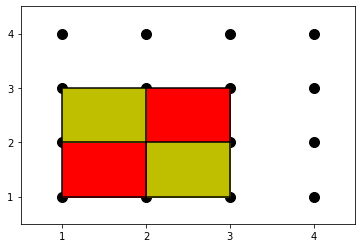

In [353]:
# This code was taken from the discussion board with slight modification
# Credit goes to Diogo Benetti Fae Rodrigues

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def print_board(board, verbose = False):
    n = board['n']  # Rows
    m = board['m']  # Columns

    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, m-0.5)
    ax.set_ylim(-0.5, n-0.5)

    # Draw dots
    for row in range(n):
        for col in range(m):
            if (row, col) in board:
                ax.scatter(row, col, s=100, marker='o', color='black')
            else:
                ax.scatter(row, col, s=100, marker='o', color='black')

    # Draw lines
    for line in board:
        # print(line)
        if line != -1 and line != 1:
            if verbose: print(line)
            if verbose: print(f"Length: {len(line)}")
            if len(line) > 2:
                # Draw Horizontal line
                if line[0] == 'h':
                    l = mlines.Line2D([line[2]-1,line[2]], [line[1]-1,line[1]-1], color='black')
                    # l = mlines.Line2D([line[1],line[1]], [line[2],line[2]+1], color='black')
                    ax.add_line(l)
                # Draw Vertical line
                else:
                    l = mlines.Line2D([line[2]-1,line[2]-1], [line[1]-1,line[1]], color='black')
                    # l = mlines.Line2D([line[1],line[1]-1], [line[2],line[2]], color='black')
                    ax.add_line(l)

    # Check for boxes
    # Boxes are stored in board with (row, col) as key and player (1 or -1) as value
    # eg: board[(3, 1)] = 1 -> player 1 has a box with top left vertex at (3, 1)
    for box in board:
        if verbose: print(box)
        if box != -1 and box != 1:
            if verbose: print(box)
            if len(box) == 2:
                if verbose: print(box)
                if board[(box[0], box[1])] == 1:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='r'))
                else:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='y'))

    # Print results
    print('Results:')
    print('         -1:', board[-1])
    print('          1:', board[1])

    # Set up plot to start at (1, 1)
    x = []
    y = []
    for row in range(board['n']):
        # x.append(row)
        x.append(row+1)
    for col in range(board['m']):
        # y.append(col)
        y.append(col+1)
    default_x_ticks = range(len(x))
    plt.xticks(default_x_ticks, x)
    default_y_ticks = range(len(y))
    plt.yticks(default_y_ticks, y)

    plt.show()

myboard = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}


print(draw_line(myboard, "v", 1, 1,1))
print(draw_line(myboard, "v", 2, 1,-1))
print(draw_line(myboard, "v", 1, 2,1))
print(draw_line(myboard, "v", 2, 3,-1))

print(draw_line(myboard, "h", 1, 2,1))
print(draw_line(myboard, "h", 2, 1,-1))
print(draw_line(myboard, "h", 2, 2,1))
print(draw_line(myboard, "h", 3, 2,-1))

print(draw_line(myboard, "v", 2, 2,1))
print(draw_line(myboard, "v", 1, 3,-1))
print(draw_line(myboard, "h", 1, 1,1))
print(draw_line(myboard, "h", 3, 1,-1))

# myboard[3,2] = 1

# print(myboard)

print_board(myboard, True)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).

--------------------ACTIONS--------------------
Results:
         -1: 2
          1: 2


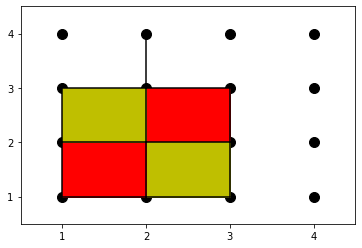

[('h', 1, 3), ('v', 1, 4), ('h', 2, 3), ('v', 2, 4), ('v', 3, 1), ('v', 3, 3), ('h', 3, 3), ('v', 3, 4), ('h', 4, 1), ('h', 4, 2), ('h', 4, 3)]
--------------------terminal--------------------
False
--------------------result--------------------
{'n': 4, 'm': 4, 1: 2, -1: 2, ('v', 1, 1): True, ('v', 2, 1): True, ('v', 1, 2): True, ('v', 2, 3): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True, ('h', 3, 2): True, ('v', 2, 2): True, (3, 2): 1, ('v', 1, 3): True, (2, 2): -1, ('h', 1, 1): True, (2, 1): 1, ('h', 3, 1): True, (3, 1): -1, ('v', 3, 2): True, ('h', 1, 3): True}
--------------------utility--------------------
None


In [376]:
# A check for available actions in each state actions(s)
def actions(s, verbose = False):
    n = s['n']  # Rows
    m = s['m']  # Columns
    actions_remaining = []
    if verbose: print_board(s)
    for row in range(n):
        for col in range(m):
            if ('v', row+1, col+1) not in s and row != n-1:
                actions_remaining.append(('v', row+1, col+1))
            if ('h', row+1, col+1) not in s and col != m-1:
                actions_remaining.append(('h', row+1, col+1))
                # print(actions_remaining)
    return actions_remaining

def terminal(s):
    if len(actions(s)) == 0: return True
    else: return False

def result(s, a, player):
    temp_s = s.copy()
    drawn, another_turn = draw_line(temp_s, a[0], a[1], a[2], player)
    if drawn is True:
        return temp_s
    else:
        print("This is not a valid move!")

def winner(s):
    if s[1] > s[-1]:
        return 1
    elif s[-1] > s[1]:
        return -1
    else:
        return 0

def utility(s, player, verbose = False):
    if terminal(s) is True:
        if player == winner(s):
            return 1
        elif winner(s) == 0:
            return 0
        else:
            return -1
    else:
        if verbose: print("Game is not over!")
        return None

print("--------------------ACTIONS--------------------")
print(actions(myboard, True))
print("--------------------terminal--------------------")
print(terminal(myboard))
print("--------------------result--------------------")
print(result(myboard, ['h', 1, 3], 1))
print("--------------------utility--------------------")
print(utility(myboard, 1))

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 or -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [355]:
import random
def random_player(board, player = None):
     action_options = actions(board).copy() #might not be needed
     a = random.choice(action_options)
     drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
     return another_turn

random_player(myboard, 1)

False

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

Each player should win 50% of the time.

The result that I got was expected because it is only 513 vs 487 meaning only 13 out of the 1000 games should have gone to player 2 to make it a %50 vs. %50 win ratio.


In [370]:
random_board = {
    'n': 4,  ### hoizontal dots
    'm': 4,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

def random_environment(board, verbose = False):
    player1_total = 0
    player2_total = 0

    for x in range(1000):
        temp_board = board.copy()
        player = 1
        while terminal(temp_board) is False:
            if not random_player(temp_board, player):
                if player == 1:
                    player = -1
                else:
                    player = 1
            if verbose: print_board(temp_board)

        if winner(temp_board) == 1:
            player1_total += 1
        elif winner(temp_board) == -1:
            player2_total += 1

    if player1_total > player2_total:
        print(f"Player 1 Wins!")
    elif player2_total > player1_total:
        print(f"Player 2 Wins!")
    else:
        print(f"Player 1 and Player 2 Tide!")
    print(f"Player 1: {player1_total} Player 2: {player2_total}")


random_environment(random_board)


Player 2 Wins!
Player 1: 490 Player 2: 510


## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]


Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.




(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
(True, False)
n
Length: 1
m
Length: 1
('v', 2, 1)
Length: 3
('v', 2, 2)
Length: 3
('v', 2, 3)
Length: 3
('v', 1, 2)
Length: 3
('h', 1, 2)
Length: 3
('h', 2, 1)
Length: 3
('h', 2, 2)
Length: 3
n
n
m
m
1
-1
('v', 2, 1)
('v', 2, 1)
('v', 2, 2)
('v', 2, 2)
('v', 2, 3)
('v', 2, 3)
('v', 1, 2)
('v', 1, 2)
('h', 1, 2)
('h', 1, 2)
('h', 2, 1)
('h', 2, 1)
('h', 2, 2)
('h', 2, 2)
Results:
         -1: 0
          1: 0


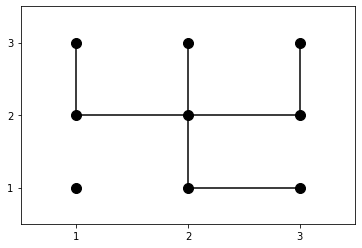

START
max in: {'n': 3, 'm': 3, 1: 0, -1: 0, ('v', 2, 1): True, ('v', 2, 2): True, ('v', 2, 3): True, ('v', 1, 2): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True}[None]
min in: {'n': 3, 'm': 3, 1: 0, -1: 0, ('v', 2, 1): True, ('v', 2, 2): True, ('v', 2, 3): True, ('v', 1, 2): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True, ('v', 1, 1): True}[None]
max in: {'n': 3, 'm': 3, 1: 0, -1: 1, ('v', 2, 1): True, ('v', 2, 2): True, ('v', 2, 3): True, ('v', 1, 2): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True, ('v', 1, 1): True, ('h', 1, 1): True, (2, 1): -1}[None]
min in: {'n': 3, 'm': 3, 1: 1, -1: 1, ('v', 2, 1): True, ('v', 2, 2): True, ('v', 2, 3): True, ('v', 1, 2): True, ('h', 1, 2): True, ('h', 2, 1): True, ('h', 2, 2): True, ('v', 1, 1): True, ('h', 1, 1): True, (2, 1): -1, ('v', 1, 3): True, (2, 2): 1}[None]
max in: {'n': 3, 'm': 3, 1: 1, -1: 2, ('v', 2, 1): True, ('v', 2, 2): True, ('v', 2, 3): True, ('v', 1, 2): True, ('h', 1, 2): True, ('h'

(1, ('v', 1, 3))

In [380]:
import math
count = 0

minimax_board = {
    'n': 3,  ### hoizontal dots
    'm': 3,   ### vertical dots
    1: 0,   ### Player 1 Starting Score
    -1: 0   ### Player 2 Starting Score
}

# print(draw_line(minimax_board, "v", 1, 1,1))
print(draw_line(minimax_board, "v", 2, 1,-1))
print(draw_line(minimax_board, "v", 2, 2,1))
print(draw_line(minimax_board, "v", 2, 3,-1))
print(draw_line(minimax_board, "v", 1, 2,1))

print(draw_line(minimax_board, "h", 1, 2,1))
print(draw_line(minimax_board, "h", 2, 1,-1))
print(draw_line(minimax_board, "h", 2, 2,1))
# print(draw_line(minimax_board, "h", 1, 1,-1))

# print(draw_line(minimax_board, "v", 2, 2,1))
# print(draw_line(minimax_board, "v", 1, 3,-1))
# print(draw_line(minimax_board, "h", 1, 1,1))
# print(draw_line(minimax_board, "h", 3, 1,-1))

def other(player):
    if player == 1: return -1
    else: return 1

def minimax_search(state, player = 1, verbose = True):
    global count
    count = 0
    if verbose: print_board(state, player)
    print("START")
    value, move = max_value(state, player, verbose)
    if verbose: print(f"Number of nodes searched: {count}")

    return value, move

def max_value(state, player, verbose = True):
    #player 1's best move.
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print("max in: " + str(state) + str([v]) )
    if v is not None: return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in actions(state):
        v2, a2 = min_value(result(state, a, player), player, verbose)
        if v2 > v:
            v, move = v2, a

    if verbose: print("max out:  + str(state)" + str([v, move]) )
    return v, move

def min_value(state, player, verbose = True):
    """opponent's best response."""
    global count
    count += 1

    # return utility of state if it is a terminal state
    v = utility(state, player)
    if verbose: print("min in: " + str(state) + str([v]))
    if v is not None: return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value(result(state, a, other(player)), player, verbose)
        if v2 < v:
            v, move = v2, a


    if verbose: print("min out: + str(state)" + str([v, move]) )
    return v, move

minimax_search(minimax_board, 1, True)

# def minimax_player(board, player = None):
#     v, a = minimax_search(board, True)
#     drawn, another_turn = draw_line(board, a[0], a[1], a[2], player)
#     return another_turn

# def minimax_environment(board, verbose = False):
#     player1_total = 0
#     player2_total = 0
#
#     for x in range(1):
#         temp_board = board.copy()
#         player = 1
#         while terminal(temp_board) is False:
#             if not minimax_environment(temp_board, player):
#                 if player == 1:
#                     player = -1
#                 else:
#                     player = 1
#             if verbose: print_board(temp_board)
#
#         if utility(temp_board) == 1:
#             player1_total += 1
#         elif utility(temp_board) == -1:
#             player2_total += 1
#
#     if player1_total > player2_total:
#         print(f"Player 1 Wins!")
#     elif player2_total > player1_total:
#         print(f"Player 2 Wins!")
#     else:
#         print(f"Player 1 and Player 2 Tide!")
#     print(f"Player 1: {player1_total} Player 2: {player2_total}")
#
# minimax_environment(minimax_board)


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [358]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

In [359]:
# Your code/ answer goes here.

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [360]:
# Your code/ answer goes here.

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [361]:
# Your code/ answer goes here.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [362]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search [30 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [363]:
# Your code/ answer goes here.

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [364]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [365]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [366]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [367]:
# Your code/ answer goes here.

## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

In [368]:
# Your code/ answer goes here.

### Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [369]:
# Your code/ answer goes here.